# Instructions for what to do _before_ running this notebook

* Run file `PSAllModels.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Make sure to set all variables to the right values.
* This will save results similar to `Bbspr_2020_8_3_17_1_humans_n_samples20_map.pickle` (located, e.g., in `C:\Users\maria\MEGAsync\SLCN\PShumanData\fitting\mice`)
* Then run file `MAPResultPlots.py` (located in `C:\Users\maria\MEGAsync\SLCN\models\`). Again, make sure to set all variables to the right values.
* This will create several files in the folder of the original results, e.g., `params_Bbspr_session_388_pymc3.csv` and `nll_bics.csv`
* It will also save files `modelwise_LLs.csv`, `subjwise_LLs.csv`, etc. in the `plots` subfolder in this directory
* Once you have these files, run this notebook here

# Imports

In [86]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(style="white")
import matplotlib.pyplot as plt
import os

from Functions import get_info_from_fullID, add_meta_column

# Directories

In [87]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_dir = 'C:/Users/maria/MEGAsync/SLCN/models/plots_MetaMice'
# plot_dir = os.path.join(base_dir, 'models/plots_1/')
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
wihi = 3

In [88]:
# winning_model_names = ['Bbspr', 'RLabnp2']
winning_model_names = ['RLab', ]
# winning_model_names = ['RLabcpnxd', 'Bbspr']
# winning_model_names = ['RLabcpnxd4', 'Bbspr']  # Should be in order!

# Plot model fits

In [89]:
def model_2rt_param_letter(model_name):
    
    for letter in ['hj', 'hi', 'h4', 'h', 'i', 'j', 'k', '4']:
        if letter in model_name:
            return letter
            
# Example use
model_2rt_param_letter('hj'), model_2rt_param_letter('h'), model_2rt_param_letter('RLab')

('hj', 'h', None)

In [109]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits.columns = ['model_name', 'slope_variable', 'n_subj', 'WAIC', 'NLL']
model_fits = model_fits.sort_values(by=['NLL']).reset_index(drop=True)
model_fits['rt_param_letter'] = model_fits.model_name.apply(model_2rt_param_letter)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,rt_param_letter
0,RLabnp2d,session,383,111311.265625,53357.632812,None
1,RLabnp2,session,383,112558.250000,54364.125000,None
2,RLabcpnd,session,383,114433.859375,54918.929688,None
3,RLabcpd,session,383,114476.109375,55323.054688,None
4,RLabcd,session,383,117526.789062,57231.394531,None
5,RLabd,session,383,124766.906250,61234.453125,None
6,RLab,session,383,127448.531250,62958.265625,None
7,RLab,session,383,127451.585938,62959.792969,None


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/models/plots_MetaMice\2_WAICs.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/models/plots_MetaMice\2_WAICs.svg


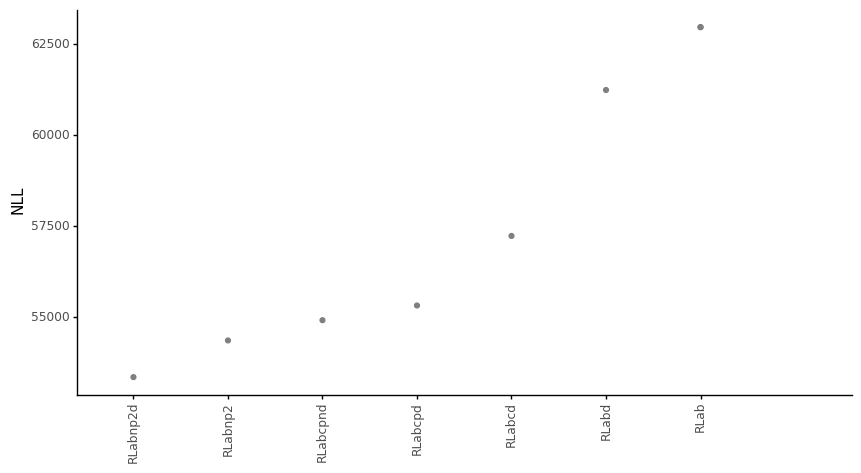

<ggplot: (134777440931)>

In [125]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'NLL', color='rt_param_letter'))
     + gg.geom_point()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.scale_x_discrete(limits=model_fits['model_name'])  # to sort them in the right order
     + gg.theme(legend_position='none')
     + gg.labs(x='')
)
g.save(os.path.join(plot_dir, '2_WAICs.png'), width=wihi, height=wihi)
g.save(os.path.join(plot_dir, '2_WAICs.svg'), width=wihi, height=wihi)
g

In [92]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,4,5,6,7,8,9,10,11,...,377,378,379,380,381,382,383,384,385,386
0,RLabnp2,5,-119.731583,-158.767975,-183.439133,-115.388428,-93.376083,-111.595696,-129.990051,-93.760628,...,-92.908470,-147.841904,-158.761551,-108.810501,-125.983803,-118.115784,-166.096024,-128.304901,-127.509476,-154.402359
1,RLabcpnd,6,-130.471847,-170.217453,-184.613846,-121.445419,-98.183876,-121.318474,-138.288422,-106.347481,...,-92.549141,-147.298325,-163.760635,-106.200478,-127.679787,-115.552017,-171.136642,-128.160706,-123.080177,-152.401047
2,RLabnp2d,6,-119.368866,-157.878586,-176.553360,-114.620285,-93.293076,-109.813034,-129.813202,-91.108902,...,-90.585381,-147.129517,-155.847702,-108.150307,-124.943024,-109.099167,-161.900513,-125.230705,-121.347824,-147.816773
3,RLab,2,-159.572479,-230.241699,-201.186706,-126.856613,-105.371918,-138.481903,-164.864456,-114.193130,...,-102.146446,-152.827896,-192.279419,-118.665832,-149.809799,-142.459183,-184.281555,-172.013718,-144.056534,-213.005707
4,RLabcpd,5,-132.332443,-171.290604,-185.660095,-121.485031,-101.207481,-121.500664,-139.842285,-108.957207,...,-93.163910,-147.656753,-164.532700,-106.879639,-127.684036,-115.975662,-174.843292,-129.668961,-123.815315,-157.897201
5,RLabcd,4,-146.211746,-197.247726,-189.534149,-122.856483,-101.512779,-121.551308,-140.023956,-108.980782,...,-98.997612,-150.189087,-175.764465,-108.195389,-137.591065,-117.035294,-177.667511,-131.236572,-124.313675,-158.091766
6,RLab,2,-159.572403,-230.245499,-201.174835,-126.810417,-105.371948,-138.481384,-164.864456,-114.193100,...,-102.144936,-152.827057,-192.279480,-118.664719,-149.809570,-142.459168,-184.280502,-172.013885,-144.056412,-212.990890
7,RLabd,3,-156.908096,-226.826248,-191.706390,-126.291649,-104.896416,-133.915802,-164.112167,-109.105774,...,-99.079514,-151.155991,-186.440949,-116.001564,-149.575058,-128.234528,-180.019714,-153.537903,-131.025513,-192.442184


In [93]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
animal_colnames = ['fullID', 'agegroup', 'sex', 'age', 'animal']
for col in animal_colnames[1:]:
    fits_[col] = fits_.fullID.apply(get_info_from_fullID, column_name=col)
fits_['rt_param_letter'] = fits_.model_name.apply(model_2rt_param_letter)
fits_

ValueError: Invalid fullID at agegroup.

In [ ]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ sex')
     + gg.labs(x='', color='')
    )
    g.draw()
    g.save(os.path.join(plot_dir, '9_{}s.png'.format(yax)))

In [ ]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=animal_colnames, values='AIC')

for col in AICs.columns:
    ref_col = winning_model_names[0]
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='sex') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=animal_colnames, value_name='AIC')
AICs_rel

In [ ]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='sex'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
 + gg.labs(x='', fill='')
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_dir, '9_RelativeAICs2.png'))

# Load fitted parameters

In [112]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    
    if ('csv' in file) and ('nll' not in file):
        print("Reading", file, "from", param_dir)
        
        new_params = pd.read_csv(os.path.join(param_dir, file))
        new_params['agegroup'] = new_params.sID.apply(get_info_from_fullID, column_name='agegroup')
        all_params = all_params.append(new_params)

# Preprocess        
all_params['agegroup'] = pd.Categorical(all_params['agegroup'], ordered=True, categories=('Juvenile', 'Adult'))
# all_params = all_params.rename(columns={'Gender': 'sex', 'PreciseYrs': 'age'})
all_params['meta'] = add_meta_column(all_params)
all_params = all_params.drop(columns=
                             ['PDS', 'T1', 'cnalpha_rew', 'slope_variable', 'fullID', 'age_z'])  #, 'p_noisy'
all_params = all_params.loc[all_params.meta != 'nan']
# all_params.beta /= 15
all_params

Reading params_RLabcd_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLabcpd_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLabcpnd_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLabd_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLabnp2d_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLabnp2_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/
Reading params_RLab_session_383_pymc3.csv from C:/Users/maria/MEGAsync/SLCN\PShumanData/fitting/mice/


,beta,persev,bias,alpha,nalpha,calpha,rta,nrta,crta,cnrta,rtb,sID,agegroup,sex,age,animal,session,cnalpha,model,meta
0,4.038032,0.0,-0.067586,0.548923,0.548923,0.998405,0.0,0.0,0.0,0.0,0.0,1404012,Juvenile,Male,40,14,0.0,0.0,RLabcd,1-3
1,2.973018,0.0,-0.064925,0.851145,0.851145,0.983598,0.0,0.0,0.0,0.0,0.0,1404112,Juvenile,Male,41,14,1.0,0.0,RLabcd,1-3
2,3.072741,0.0,-0.177175,0.792111,0.792111,0.563235,0.0,0.0,0.0,0.0,0.0,1404212,Juvenile,Male,42,14,2.0,0.0,RLabcd,1-3
3,14.980251,0.0,0.012572,0.937421,0.937421,0.844505,0.0,0.0,0.0,0.0,0.0,1404312,Juvenile,Male,43,14,3.0,0.0,RLabcd,4-8
4,6.406473,0.0,-0.005657,0.712636,0.712636,0.923420,0.0,0.0,0.0,0.0,0.0,1404412,Juvenile,Male,44,14,4.0,0.0,RLabcd,4-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,4.936813,0.0,0.000000,0.658835,0.658835,0.000000,0.0,0.0,0.0,0.0,0.0,1307921,Adult,Female,79,13,4.0,0.0,RLab,4-8
379,3.405659,0.0,0.000000,0.781562,0.781562,0.000000,0.0,0.0,0.0,0.0,0.0,1308021,Adult,Female,80,13,5.0,0.0,RLab,4-8
380,3.981807,0.0,0.000000,0.680633,0.680633,0.000000,0.0,0.0,0.0,0.0,0.0,1308121,Adult,Female,81,13,6.0,0.0,RLab,4-8
381,4.945244,0.0,0.000000,0.774418,0.774418,0.000000,0.0,0.0,0.0,0.0,0.0,1308221,Adult,Female,82,13,7.0,0.0,RLab,4-8


In [113]:
animal_colnames = ['sID', 'session', 'agegroup', 'sex', 'age', 'animal', 'meta']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
# all_params_long = add_meta_column(all_params_long)
all_params_long

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
0,1404012,0.0,Juvenile,Male,40,14,1-3,RLabcd,beta,4.038032
1,1404112,1.0,Juvenile,Male,41,14,1-3,RLabcd,beta,2.973018
2,1404212,2.0,Juvenile,Male,42,14,1-3,RLabcd,beta,3.072741
3,1404312,3.0,Juvenile,Male,43,14,4-8,RLabcd,beta,14.980251
4,1404412,4.0,Juvenile,Male,44,14,4-8,RLabcd,beta,6.406473
...,...,...,...,...,...,...,...,...,...,...
31784,1307921,4.0,Adult,Female,79,13,4-8,RLabnp2,cnalpha,0.503975
31785,1308021,5.0,Adult,Female,80,13,4-8,RLabnp2,cnalpha,0.538570
31786,1308121,6.0,Adult,Female,81,13,4-8,RLabnp2,cnalpha,0.481343
31787,1308221,7.0,Adult,Female,82,13,4-8,RLabnp2,cnalpha,0.414426


## Plot winning models

In [114]:
plotted_model_name = 'RLabnp2d'  # 'Bbspr'  # 'RLabcpnxd4'

win_mod_sub = all_params_long.model == plotted_model_name
not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
plot_dat_params = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
plot_dat_params['meta'] = add_meta_column(plot_dat_params)

<ipython-input-114-ef1a3284ea1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [115]:
plot_dat_params

,sID,session,agegroup,sex,age,animal,meta,model,param_name,param_value
1532,1404012,0.0,Juvenile,Male,40,14,1-3,RLabnp2d,beta,2.779696
1533,1404112,1.0,Juvenile,Male,41,14,1-3,RLabnp2d,beta,1.894046
1534,1404212,2.0,Juvenile,Male,42,14,1-3,RLabnp2d,beta,2.096338
1535,1404312,3.0,Juvenile,Male,43,14,4-8,RLabnp2d,beta,4.815445
1536,1404412,4.0,Juvenile,Male,44,14,4-8,RLabnp2d,beta,6.114212
...,...,...,...,...,...,...,...,...,...,...
31401,1307921,4.0,Adult,Female,79,13,4-8,RLabnp2d,cnalpha,0.396387
31402,1308021,5.0,Adult,Female,80,13,4-8,RLabnp2d,cnalpha,0.477598
31403,1308121,6.0,Adult,Female,81,13,4-8,RLabnp2d,cnalpha,0.433743
31404,1308221,7.0,Adult,Female,82,13,4-8,RLabnp2d,cnalpha,0.377887


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 9 x 9 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/models/plots_MetaMice\3_Params.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 32431 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 32431 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 9 x 9 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/models/plots_MetaMice\3_Params.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: Plotn

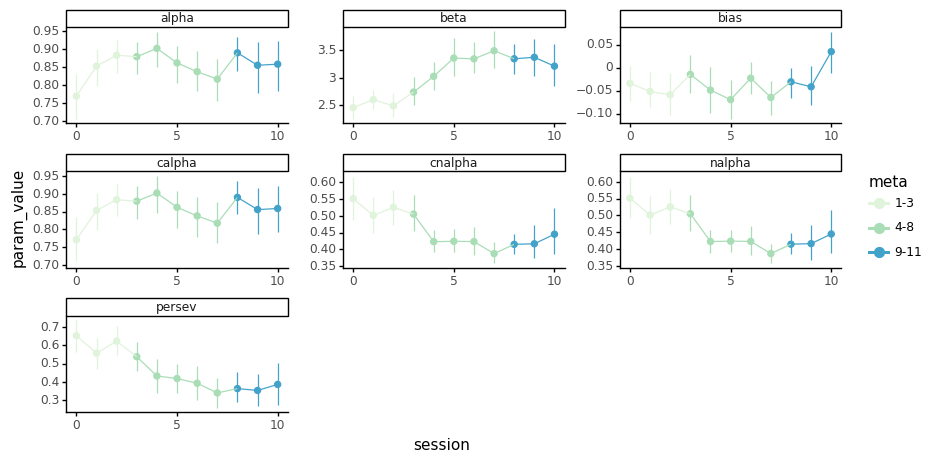

<ggplot: (134781785802)>

In [127]:
plot_dat_params = plot_dat_params.groupby(['sex', 'animal', 'agegroup', 'meta', 'session', 'param_name']).aggregate('mean').reset_index()
plot_dat_params

g = (gg.ggplot(plot_dat_params, gg.aes('session', 'param_value', color='meta', group=1))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.scale_color_brewer(type='seq', palette=4)
     + gg.scale_x_continuous(breaks=(0, 5, 10))
     + gg.facet_wrap('~ param_name', scales='free')
     + gg.theme(subplots_adjust={'wspace': 0.25, 'hspace': 0.5})
    )
g_s = (g
       + gg.facet_wrap('~ sex + param_name + agegroup', scales='free')       
      )

g.save(os.path.join(plot_dir, '3_Params.png'), width=3 * wihi, height=3 * wihi)
g.save(os.path.join(plot_dir, '3_Params.svg'), width=3 * wihi, height=3 * wihi)
g_s.save(os.path.join(plot_dir, 'S3_Params.png'), width=8 * wihi, height=8 * wihi)
g_s.save(os.path.join(plot_dir, 'S3_Params.svg'), width=8 * wihi, height=8 * wihi)

g

In [131]:
sub_dat = subj_dat.loc[
    (subj_dat['param_name'] == 'alpha') & (subj_dat['session'] < 3)
].dropna()

print(smf.mixedlm('param_value ~ (agegroup + sex + session) * (agegroup + sex + session)', data=sub_dat, groups=sub_dat['animal']).fit().summary())

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      param_value
No. Observations:      114          Method:                  REML       
No. Groups:            38           Scale:                   0.0257     
Min. group size:       3            Log-Likelihood:          32.5486    
Max. group size:       3            Converged:               Yes        
Mean group size:       3.0                                              
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      0.899    0.045 19.860 0.000  0.810  0.988
agegroup[T.Adult]             -0.100    0.062 -1.602 0.109 -0.222  0.022
sex[T.Male]                   -0.122    0.054 -2.256 0.024 -0.227 -0.016
agegroup[T.Adult]:sex[T.Male] -0.064    0.064 -0.998 0.318 -0.190  0.

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


In [129]:
for param_name in np.unique(plot_dat_params['param_name']):
    print("Model on", param_name)
    
    sub_dat = subj_dat.loc[
        (subj_dat['param_name'] == param_name)
    ].dropna()

    print(smf.mixedlm('param_value ~ (agegroup + sex + session) * (agegroup + sex + session)', data=sub_dat, groups=sub_dat['animal']).fit().summary())

Model on alpha


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarnin

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      param_value
No. Observations:      383          Method:                  REML       
No. Groups:            38           Scale:                   0.0246     
Min. group size:       4            Log-Likelihood:          126.1733   
Max. group size:       11           Converged:               No         
Mean group size:       10.1                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      0.918    0.036 25.833 0.000  0.849  0.988
agegroup[T.Adult]             -0.099    0.051 -1.952 0.051 -0.198  0.000
sex[T.Male]                   -0.074    0.043 -1.731 0.083 -0.159  0.010
agegroup[T.Adult]:sex[T.Male]  0.008    0.058  0.143 0.886 -0.105  0.

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      param_value
No. Observations:      383          Method:                  REML       
No. Groups:            38           Scale:                   0.0127     
Min. group size:       4            Log-Likelihood:          245.9565   
Max. group size:       11           Converged:               Yes        
Mean group size:       10.1                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     -0.044    0.027 -1.596 0.111 -0.098  0.010
agegroup[T.Adult]              0.014    0.040  0.361 0.718 -0.064  0.092
sex[T.Male]                   -0.024    0.033 -0.717 0.474 -0.089  0.041
agegroup[T.Adult]:sex[T.Male]  0.015    0.047  0.326 0.745 -0.076  0.

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2118: ConvergenceWarnin

                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      param_value
No. Observations:      383          Method:                  REML       
No. Groups:            38           Scale:                   0.0246     
Min. group size:       4            Log-Likelihood:          126.1733   
Max. group size:       11           Converged:               No         
Mean group size:       10.1                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      0.918    0.036 25.833 0.000  0.849  0.988
agegroup[T.Adult]             -0.099    0.051 -1.952 0.051 -0.198  0.000
sex[T.Male]                   -0.074    0.043 -1.731 0.083 -0.159  0.010
agegroup[T.Adult]:sex[T.Male]  0.008    0.058  0.143 0.886 -0.105  0.

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


# Plotting functions

In [37]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [38]:
def plot_session_params(data, winning_model_name):

    gg.options.figure_size = (8, 5)
    
    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='agegroup'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
#      + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(y='')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
    )

    save_dir = os.path.join(plot_dir, '10_ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    gg.options.figure_size = (5, 5)

    
    return g
    
# # Example use
# plot_session_params(sub_dat, plotted_model_name)

In [39]:
def plot_meta_params(data, winning_model_name):

    # Males only
    sub_dat_male = data[data.sex == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
#      + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ agegroup + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('agegroup ~ param_name')
    )
    g_male.save(os.path.join(plot_dir, '11_ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    # Females only
    g_female = g_male
    g_female.data = data[data.sex == 'Female']
    g_female.save(os.path.join(plot_dir, '11_ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
    return g_female
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [40]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    gg.options.figure_size = (8, 5)
    sub_dat_male = data[data.sex == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('agegroup', 'param_value', fill='agegroup'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5),
                legend_position='none')
#      + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ meta + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
#      + gg.facet_grid('meta ~ param_name')
    )
    g_m.save(os.path.join(plot_dir, '12_ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.sex == 'Female']
    g_f.save(os.path.join(plot_dir, '12_ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    gg.options.figure_size = (5, 5)

    return g_f
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [41]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    gg.options.figure_size = (8, 5)
    g = (gg.ggplot(data, gg.aes('age', 'param_value', color='sex'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
#      + gg.facet_grid('sex ~ param_name')
     + gg.facet_wrap('~ sex + param_name', scales='free_y', ncol=len(np.unique(sub_dat.param_name)))
     + gg.labs(x='Age', y='')
    )
    g.save(os.path.join(plot_dir, '13_ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    gg.options.figure_size = (5, 5)
    
    return g
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

In [42]:
def update_q(old_q, alpha, rpe, rt, rta):
    
    rta_ = rta * (rt - 1) + 1
    return old_q + (rta_ * alpha * rpe)

# Example
update_q(old_q=0.5, alpha=0.5, rpe=0.2, rt=0.2, rta=-0.2)

0.616

In [20]:
for plotted_model_name in winning_model_names:

    print('Plotting {}.'.format(plotted_model_name))
    
    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

Plotting RLabcpnxd4.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabcpnxd4.png


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabcpnxd4.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/1

Plotting RLabnp24.
Saving to C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp24.png


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/10_ParamsSession_RLabnp24.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\facets\facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/11_

# Parameter correlations between models

In [21]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

,beta_RL,persev_RL,bias_RL,p_noisy_RL,sID,agegroup,sex,age,animal,session,...,beta_BF,persev_BF,p_noisy_BF,p_switch_BF,p_reward_BF,rta_BF,crta_BF,nrta_BF,cnrta_BF,rtb_BF
0,2.821810,0.982658,0.0,NaN,1404012,Juvenile,Male,40,14,0.0,...,2.849645,0.977221,NaN,NaN,NaN,-0.264027,-0.243116,0.355202,0.361415,0.0
1,1.863845,0.996651,0.0,NaN,1404112,Juvenile,Male,41,14,1.0,...,1.880015,0.996999,NaN,NaN,NaN,-0.156364,-0.294273,0.553173,-0.012938,0.0
2,1.663224,0.925094,0.0,NaN,1404212,Juvenile,Male,42,14,2.0,...,2.266818,0.474837,NaN,NaN,NaN,0.076635,-0.535723,0.885098,-0.203363,0.0
3,4.417085,0.661793,0.0,NaN,1404312,Juvenile,Male,43,14,3.0,...,4.874597,0.519543,NaN,NaN,NaN,-0.115959,-0.500560,-0.934781,-0.613683,0.0
4,7.920196,0.147897,0.0,NaN,1404412,Juvenile,Male,44,14,4.0,...,14.892414,0.068650,NaN,NaN,NaN,0.036761,0.000035,-0.486022,0.301549,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2.723638,0.698993,0.0,NaN,1307921,Adult,Female,79,13,4.0,...,3.416003,0.440261,NaN,NaN,NaN,-0.105569,-0.105568,0.248598,0.248597,0.0
379,2.177068,0.596931,0.0,NaN,1308021,Adult,Female,80,13,5.0,...,2.362282,0.479181,NaN,NaN,NaN,-0.216004,-0.216004,0.372999,0.372997,0.0
380,2.911290,0.516583,0.0,NaN,1308121,Adult,Female,81,13,6.0,...,4.141008,0.263642,NaN,NaN,NaN,0.255114,0.640825,-0.663366,-0.387794,0.0
381,2.991637,0.468386,0.0,NaN,1308221,Adult,Female,82,13,7.0,...,3.559137,0.315252,NaN,NaN,NaN,-0.188531,-0.372633,0.727641,0.474082,0.0


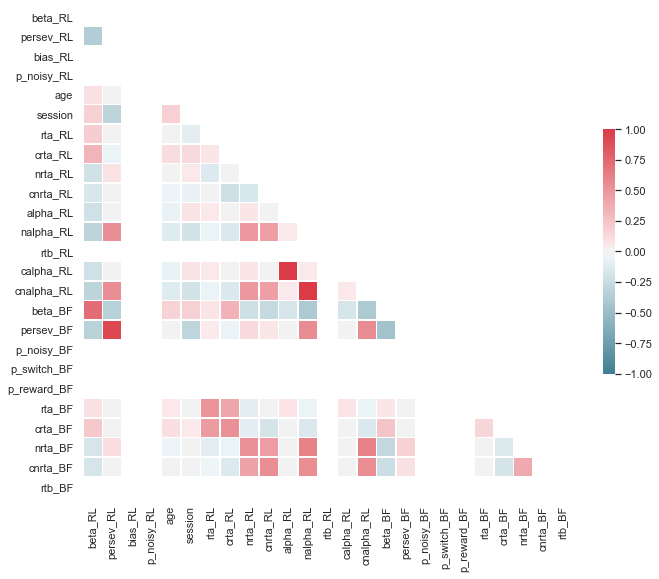

In [22]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_dir, '14_CorrelationMatrix.png'))

# Vizualize the effects of RT parameters rta and rtb

In [23]:
# Create data for vizualization
rpe = 0.2

rta_dat = pd.DataFrame()

for alpha in [0.1, 0.5, 0.9]:
    for old_q in [0.4, 0.5, 0.6]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rta in [-0.4, -0.2, 0, 0.2, 0.4]:

                new_q = update_q(old_q=old_q, alpha=alpha, rpe=rpe, rt=rt, rta=rta)
                new_row = pd.DataFrame(
                    {'old_q': [old_q], 'alpha': [alpha], 'rpe': [rpe], 'rt': [rt], 'rta': [rta], 'new_q': [new_q]})

                rta_dat = pd.concat([rta_dat, new_row])
        
rta_dat

,old_q,alpha,rpe,rt,rta,new_q
0,0.4,0.1,0.2,0.0,-0.4,0.4280
0,0.4,0.1,0.2,0.0,-0.2,0.4240
0,0.4,0.1,0.2,0.0,0.0,0.4200
0,0.4,0.1,0.2,0.0,0.2,0.4160
0,0.4,0.1,0.2,0.0,0.4,0.4120
...,...,...,...,...,...,...
0,0.6,0.9,0.2,0.9,-0.4,0.7872
0,0.6,0.9,0.2,0.9,-0.2,0.7836
0,0.6,0.9,0.2,0.9,0.0,0.7800
0,0.6,0.9,0.2,0.9,0.2,0.7764


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rta.png


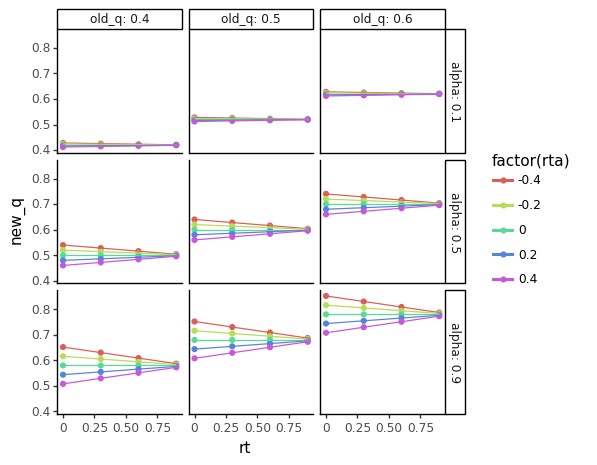

<ggplot: (82814522688)>

In [24]:
# Bottom line:
    # positive rta: longer rts => larger updates
    # negative rta: longer rts => smaler updates
    # rta == 0: no effect of rts on updates
    # larger alpha: larger effect of rts
    # larger old_q: no difference
gg.options.figure_size = (5, 5)
g = (gg.ggplot(rta_dat, gg.aes('rt', 'new_q', color='factor(rta)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.facet_grid('alpha ~ old_q', labeller='label_both')
)
g.save(os.path.join(plot_dir, '20_Understand_rta.png'))
g

In [25]:
def p_from_qs(q_diff, beta, bias, rtb, rt):
    
    rtb_ = rtb * (rt - 1) + 1
    return 1 / (1 + np.exp(rtb_ * beta * (q_diff + bias)))

# Example use
p_from_qs(q_diff=0.3, beta=2, bias=0, rtb=0.2, rt=0.5)

0.3681875822638983

In [26]:
# Create data for vizualization
rtb_dat = pd.DataFrame()

bias = 0
for q_diff in [-0.3, 0, 0.3]:
    for beta in [0.1, 1, 3]:
        for rt in [0, 0.3, 0.6, 0.9]:
            for rtb in [-0.4, -0.2, 0, 0.2, 0.4]:

                p = p_from_qs(q_diff=q_diff, beta=beta, bias=bias, rtb=rtb, rt=rt)
                new_row = pd.DataFrame(
                    {'q_diff': [q_diff], 'beta': [beta], 'bias': [bias], 'rt': [rt], 'rtb': [rtb], 'p': [p]})

                rtb_dat = pd.concat([rtb_dat, new_row])
        
rtb_dat

,q_diff,beta,bias,rt,rtb,p
0,-0.3,0.1,0,0.0,-0.4,0.510498
0,-0.3,0.1,0,0.0,-0.2,0.508999
0,-0.3,0.1,0,0.0,0.0,0.507499
0,-0.3,0.1,0,0.0,0.2,0.506000
0,-0.3,0.1,0,0.0,0.4,0.504500
...,...,...,...,...,...,...
0,0.3,3.0,0,0.9,-0.4,0.281709
0,0.3,3.0,0,0.9,-0.2,0.285366
0,0.3,3.0,0,0.9,0.0,0.289050
0,0.3,3.0,0,0.9,0.2,0.292764


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/20_Understand_rtb.png


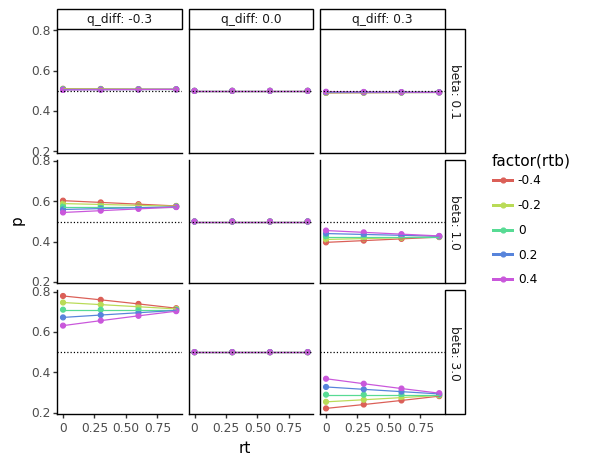

<ggplot: (82819204976)>

In [27]:
g = (gg.ggplot(rtb_dat, gg.aes('rt', 'p', color='factor(rtb)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.geom_hline(yintercept=0.5, linetype='dotted')
     + gg.facet_grid('beta ~ q_diff', labeller='label_both')
    )
g.save(os.path.join(plot_dir, '20_Understand_rtb.png'))
g

## Stats on parameter differences

In [28]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + sex + agegroup) * (session + sex + agegroup)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'sex[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:sex[T.Male]': 'Interaction'
#     'sex[T.Male]': 'Sex', 'session:sex[T.Male]': 'Interaction'
    'sex[T.Male]': 'Sex', 'session': 'Session', 'agegroup[T.adult]': 'Agegroup',
    'sex[T.Male]:agegroup[T.adult]': 'Sex:Agegroup',
    'session:sex[T.Male]': 'Session:Sex',
    'session:agegroup[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_dir, '15_RegrModels.png'))
g.draw()

# OLD

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)